In [17]:
import pandas as pd
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Path to the ZIP file
zip_file_path = r'D:\titanic.zip'

# Folder where the data will be extracted
extracted_folder = 'extracted_data'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Load each CSV file into a DataFrame
gender_submission_df = pd.read_csv(os.path.join(extracted_folder, 'gender_submission.csv'))
train_df = pd.read_csv(os.path.join(extracted_folder, 'train.csv'))
test_df = pd.read_csv(os.path.join(extracted_folder, 'test.csv'))

# Display the first few rows of each DataFrame
print(gender_submission_df.head())
print(train_df.head())
print(test_df.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  S

In [18]:
# Load the Titanic dataset from the CSV file
df = pd.read_csv('extracted_data/train.csv')

# Data Cleaning
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)
df['Pclass'] = df['Pclass'].astype('category')

In [19]:
# Encoding Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

Survival Counts:
 0    549
1    342
Name: Survived, dtype: int64

Survival Percentages:
 0    61.616162
1    38.383838
Name: Survived, dtype: float64


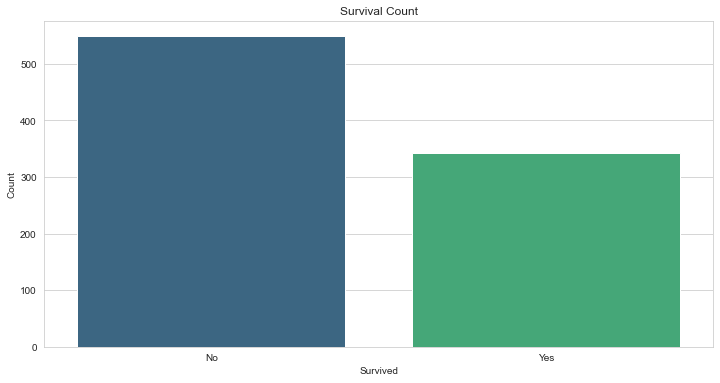

In [22]:
# EDA
# Univariate Analysis - Survival Count

# Calculate survival rates
survival_counts = df['Survived'].value_counts()
survival_percentages = df['Survived'].value_counts(normalize=True) * 100

print("Survival Counts:\n", survival_counts)
print("\nSurvival Percentages:\n", survival_percentages)

#plotting 
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

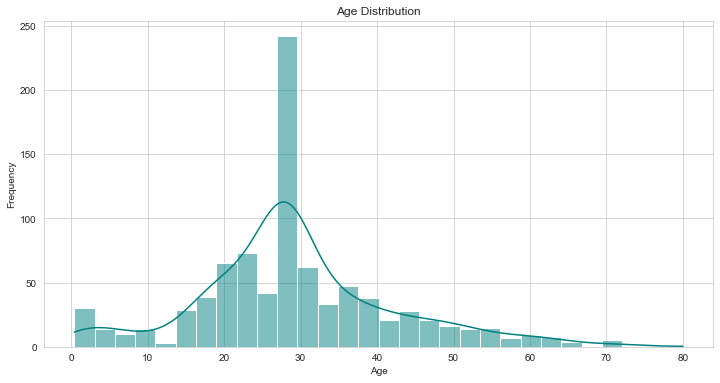

In [23]:
# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



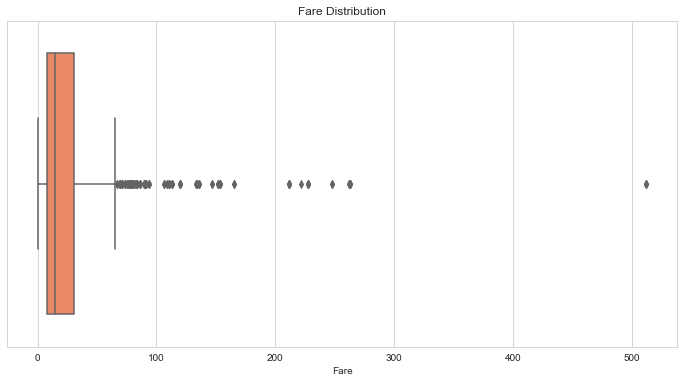

In [24]:
# Fare Distribution
sns.boxplot(x='Fare', data=df, color='coral')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

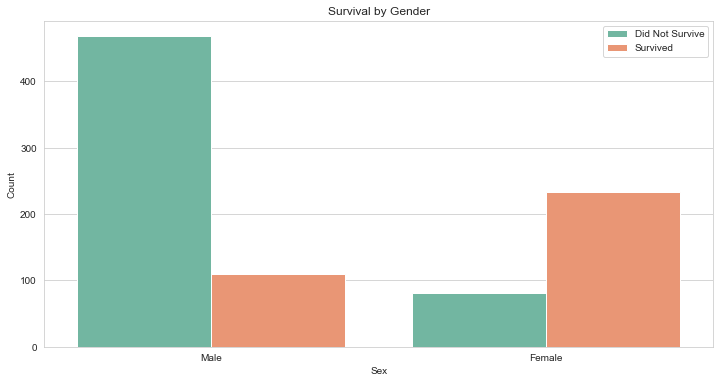

In [25]:
# Bivariate Analysis - Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0,1], ['Male', 'Female'])
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

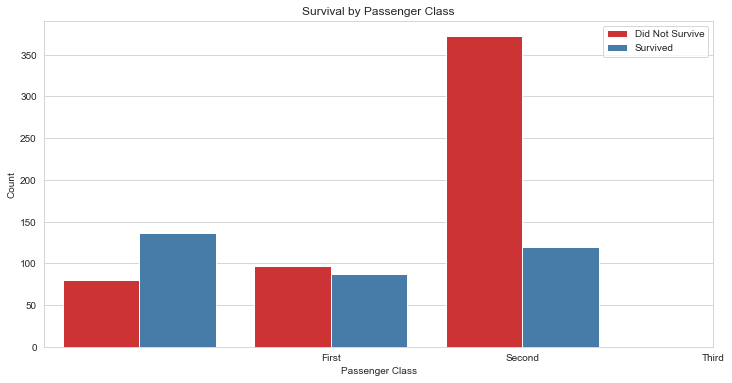

In [31]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([1,2,3], ['First', 'Second', 'Third'])
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

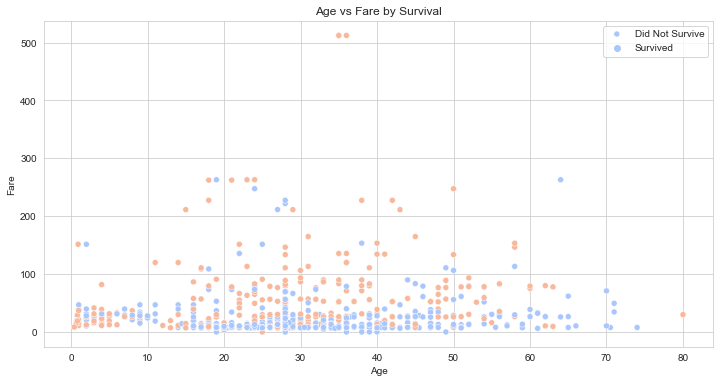

In [32]:
# Age vs Fare by Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()


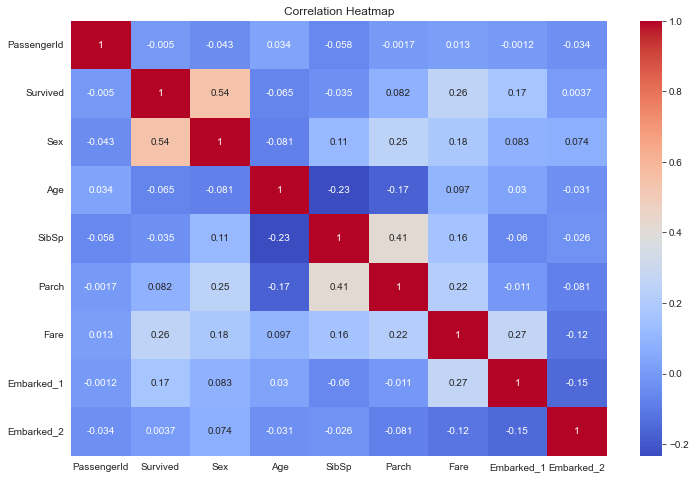

In [34]:
# Multivariate Analysis - Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


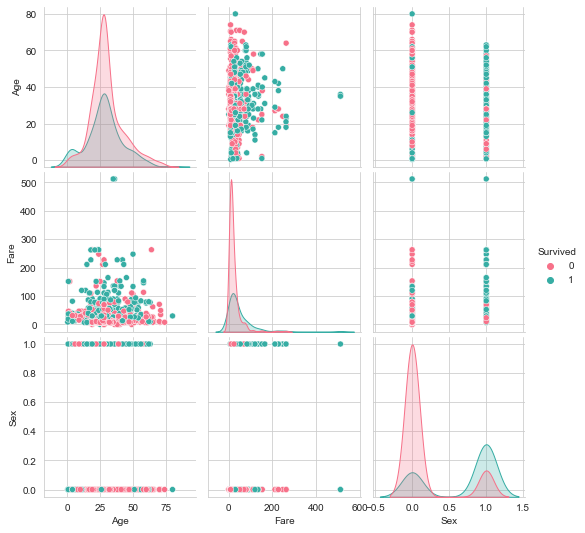

In [35]:
# Pair Plot
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Sex', 'Pclass']], hue='Survived', palette='husl')
plt.show()